In [2]:
import os
os.chdir("C:\\Users\\suraj\\Downloads\\Case Study 2 _ Uber Analysis")

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

%matplotlib inline

In [4]:
df= pd.read_csv("Uber Request Data.csv")

In [5]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
df.shape

(6745, 6)

In [7]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
boolean= df["Request id"].duplicated().any()
boolean

False

In [11]:
df["Request timestamp"]= pd.to_datetime(df["Request timestamp"], dayfirst= True)
df["Drop timestamp"]= pd.to_datetime(df["Drop timestamp"], dayfirst = True)

In [12]:
df["Drop timestamp"].value_counts()

2016-07-12 21:04:00    4
2016-07-11 13:00:00    4
2016-07-12 21:53:00    4
2016-07-12 06:22:00    4
2016-07-11 10:10:00    3
                      ..
2016-07-13 07:35:04    1
2016-07-13 03:54:57    1
2016-07-15 15:46:10    1
2016-07-12 07:07:00    1
2016-07-11 04:54:00    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [13]:
df["Request timestamp"]= df["Request timestamp"].astype(str)

In [14]:
df["Request timestamp"]= df["Request timestamp"].replace("/","-")

In [15]:
df["Request timestamp"]= pd.to_datetime(df["Request timestamp"], dayfirst= True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [17]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [18]:
drop_hr=df["Drop timestamp"].dt.hour
drop_day=df["Drop timestamp"].dt.day
Req_hr=df["Request timestamp"].dt.hour
Req_day=df["Request timestamp"].dt.day

In [19]:
df["drop_hr"]= drop_hr
df["drop_day"]= drop_day
df["Req_hr"]= Req_hr
df["Req_day"]= Req_day

In [20]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,drop_day,Req_hr,Req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,13.0,11.0,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,18.0,11.0,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,12.0,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,22.0,12.0,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,9.0,13.0,8,13


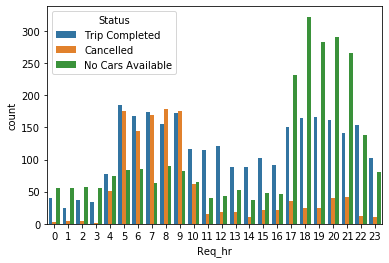

In [21]:
sns.countplot(x="Req_hr", data = df, hue= "Status")

In [24]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,13.0,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,18.0,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,22.0,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,9.0,8,13


In [23]:
df=df.drop(["drop_day"], axis = 1)

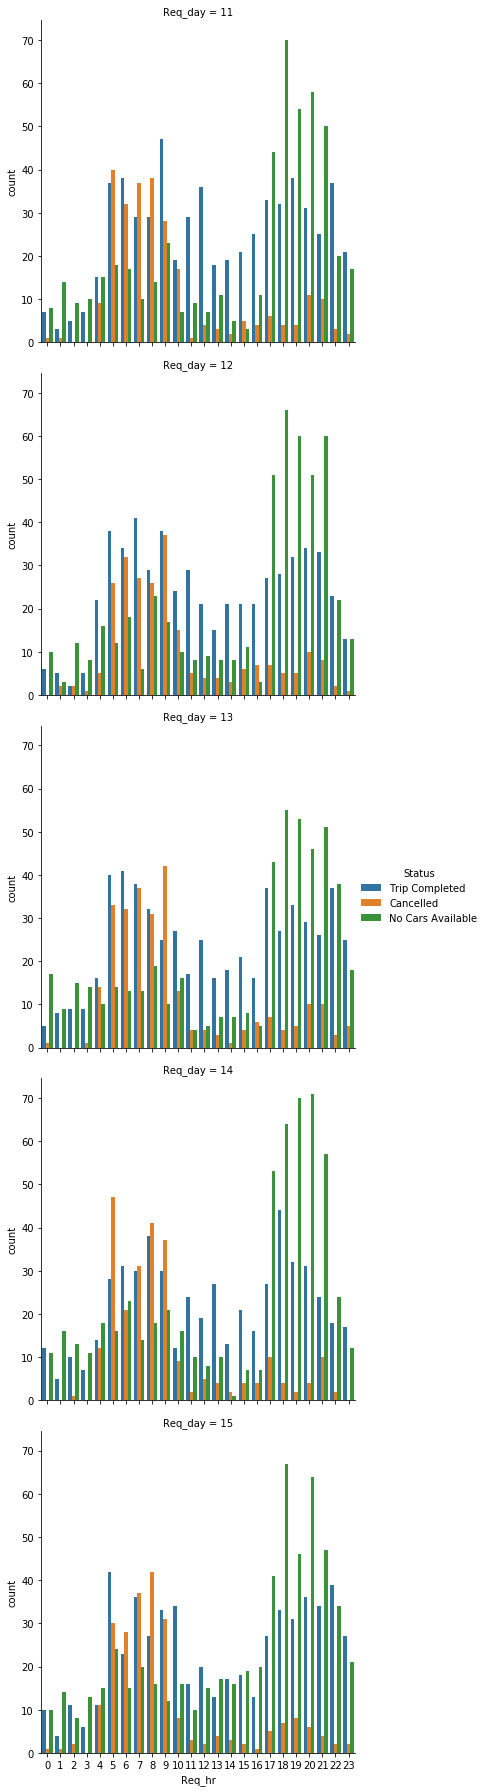

In [26]:
sns.factorplot(x="Req_hr",data = df, row= "Req_day", hue= "Status", kind= "count")

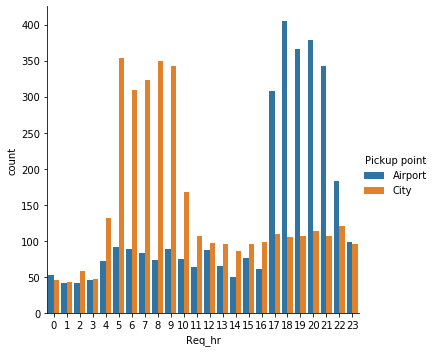

In [28]:
sns.factorplot(x="Req_hr",data = df, hue= "Pickup point", kind= "count")

In [43]:
Duration = []        

In [44]:
for i in range (len(df["Req_hr"])):
    if df["Req_hr"][i]<5:
        Duration.append("Early_morning")
    elif df["Req_hr"][i]>=5 and df["Req_hr"][i]<10:
        Duration.append("Morning_Rush")
    elif df["Req_hr"][i]>=10 and df["Req_hr"][i]<17:
        Duration.append("Day-time")
    elif df["Req_hr"][i]>=17 and df["Req_hr"][i]<22:
        Duration.append("Evening_Rush")
    else:
        Duration.append("Late_Night")

In [46]:
df["Duration"]= Duration

In [47]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,13.0,11,11,Day-time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,18.0,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,22.0,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,9.0,8,13,Morning_Rush


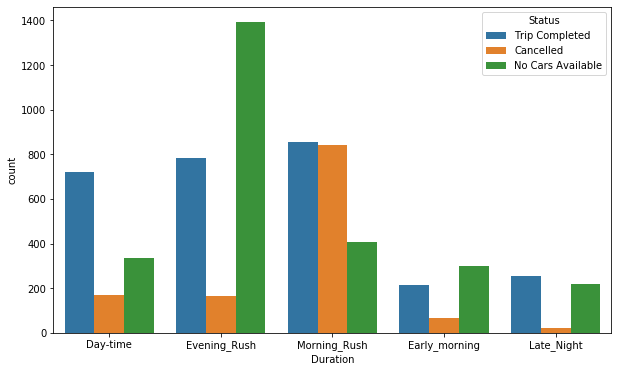

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x="Duration", hue= "Status",data = df)
plt.show()

In [62]:
df_Morning_rush=df[df["Duration"]=="Morning_Rush"]

In [63]:
df_Morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day,Duration
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,9.0,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,7.0,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,6.0,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,7.0,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,NaN,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,NaN,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,NaN,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,NaN,9,15,Morning_Rush


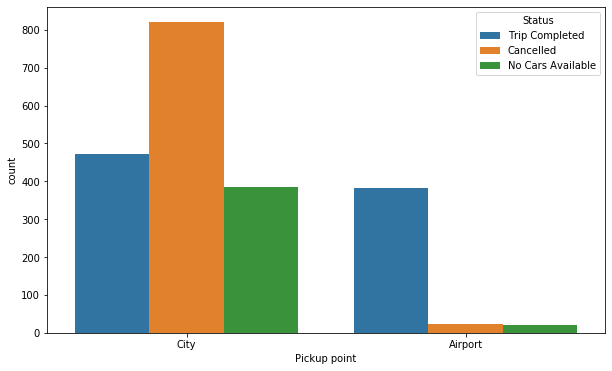

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue= "Status",data = df_Morning_rush)
plt.show()

In [65]:
df_Evening_rush=df[df["Duration"]=="Evening_Rush"]

In [66]:
df_Evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day,Duration
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,18.0,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,22.0,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,22.0,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,18.0,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,18.0,17,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,NaN,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,NaN,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,NaN,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,NaN,21,15,Evening_Rush


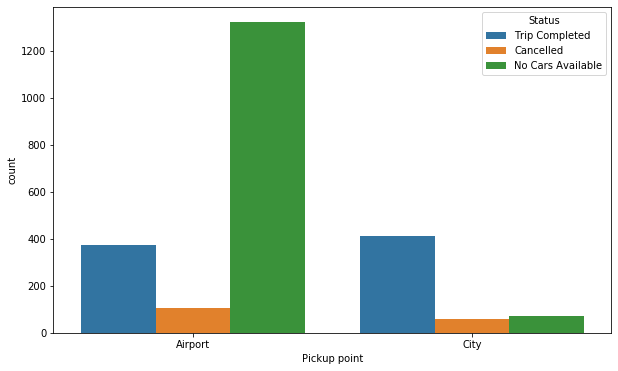

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue= "Status",data = df_Evening_rush)
plt.show()

## Demand & Supply for Morning Rush hr

In [71]:
df_airport_cancelled= df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="Airport") & (df_Morning_rush["Status"]=="Cancelled")]

In [73]:
df_airport_cancelled.shape[0]

23

In [74]:
df_city_cancelled= df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="City") & (df_Morning_rush["Status"]=="Cancelled")]

In [75]:
df_city_cancelled.shape[0]

820

In [76]:
df_city_req= df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="City")]

In [77]:
df_city_req.shape[0]

1677

In [78]:
df_city_available= df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="City") & (df_Morning_rush["Status"]=="Trip Completed")]

In [79]:
df_city_available.shape[0]

472

In [81]:
df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="Airport") & (df_Morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [83]:
df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [94]:
df_Morning_rush["Status"].value_counts()

Trip Completed       854
Cancelled            843
No Cars Available    406
Name: Status, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

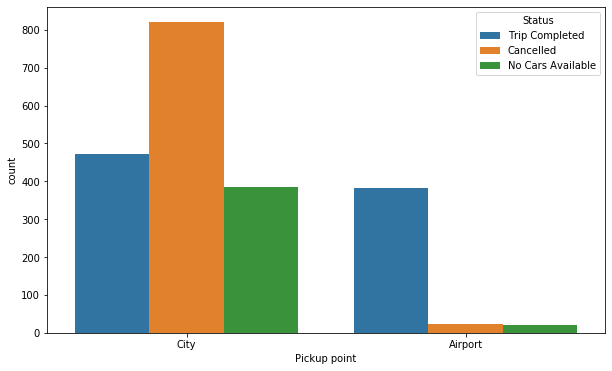

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue="Status", data= df_Morning_rush)
plt.show

## Demand & Supply for Evening Rush hrs

In [84]:
df_EV_airport= df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="Airport")]

In [85]:
df_EV_airport.shape[0]

1800

In [86]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="Airport") & (df_Evening_rush["Status"]=="Cancelled")].shape[0]

106

In [87]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="Airport") & (df_Evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [88]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="City")].shape[0]

542

In [89]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="City") & (df_Evening_rush["Status"]=="Cancelled")].shape[0]

60

In [95]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="City") & (df_Evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [92]:
df_Evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

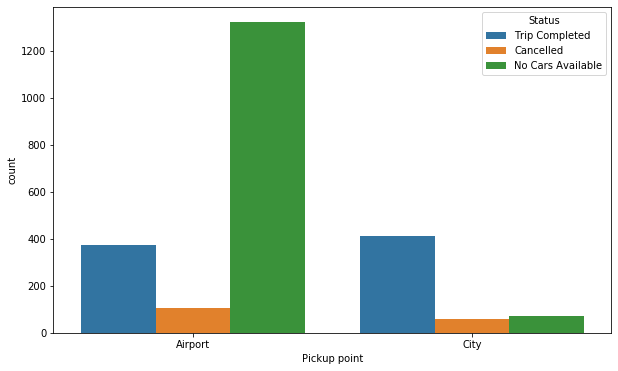

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue="Status", data= df_Evening_rush)
plt.show

### Severity Issue at both  location because of the cancellation of cabs for Morning Rush Hrs

In [98]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="Airport") & (df_Evening_rush["Status"]=="Cancelled")].shape[0]

106

In [99]:
df_Evening_rush.loc[(df_Evening_rush["Pickup point"]=="City") & (df_Evening_rush["Status"]=="Cancelled")].shape[0]

60

### Severity Issue at both  location because of the cancellation of cabs for Evening Rush Hrs

In [100]:
df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="Airport") & (df_Morning_rush["Status"]=="Cancelled")].shape[0]

23

In [101]:
df_Morning_rush.loc[(df_Morning_rush["Pickup point"]=="City") & (df_Morning_rush["Status"]=="Cancelled")].shape[0]

820

## Analysis for Day time hrs

In [106]:
df_daytime=df[df["Duration"]=="Day-time"]

In [107]:
df_daytime.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,13.0,11,11,Day-time
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12.0,12,12,Day-time
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,15.0,14,13,Day-time
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12.0,12,14,Day-time
18,535,Airport,3.0,Trip Completed,2016-07-11 10:00:00,2016-07-11 10:31:00,10.0,10,11,Day-time


### Day-time Severity Issue 

In [108]:
df_daytime.loc[(df_daytime["Pickup point"]=="Airport") & (df_daytime["Status"]=="Cancelled")].shape[0]

64

In [112]:
df_daytime.loc[(df_daytime["Pickup point"]=="City") & (df_daytime["Status"]=="Cancelled")].shape[0]

104

### Day-time Supply & Demand

In [110]:
df_daytime["Status"].value_counts()

Trip Completed       722
No Cars Available    334
Cancelled            168
Name: Status, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

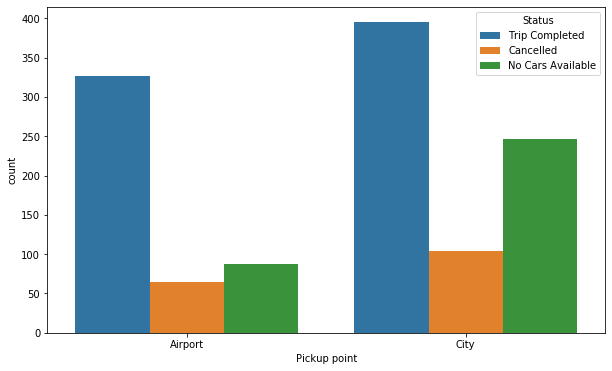

In [111]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue="Status", data= df_daytime)
plt.show

In [113]:
df_daytime_airport = df_daytime.loc[(df_daytime["Pickup point"]=="Airport")]

In [114]:
df_daytime_airport["Status"].value_counts()

Trip Completed       327
No Cars Available     87
Cancelled             64
Name: Status, dtype: int64

In [115]:
df_daytime_City = df_daytime.loc[(df_daytime["Pickup point"]=="City")]

In [116]:
df_daytime_City["Status"].value_counts()

Trip Completed       395
No Cars Available    247
Cancelled            104
Name: Status, dtype: int64

# Analysis For Early Morning

In [117]:
df_Early_mrng=df[df["Duration"]=="Early_morning"]

In [118]:
df_Early_mrng.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day,Duration
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,5.0,4,13,Early_morning
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,3.0,2,15,Early_morning
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:35,2016-07-14 03:21:38,3.0,2,14,Early_morning
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:14,2016-07-14 03:30:27,3.0,2,14,Early_morning
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016-07-15 01:07:39,1.0,0,15,Early_morning


### Severity issue for Early Morning

In [119]:
df_Early_mrng.loc[(df_Early_mrng["Pickup point"]=="Airport") & (df_Early_mrng["Status"]=="Cancelled")].shape[0]

2

In [120]:
df_Early_mrng.loc[(df_Early_mrng["Pickup point"]=="City") & (df_Early_mrng["Status"]=="Cancelled")].shape[0]

63

### Demand & Supply for Early Morning 

In [121]:
df_Early_mrng["Status"].value_counts()

No Cars Available    299
Trip Completed       214
Cancelled             65
Name: Status, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

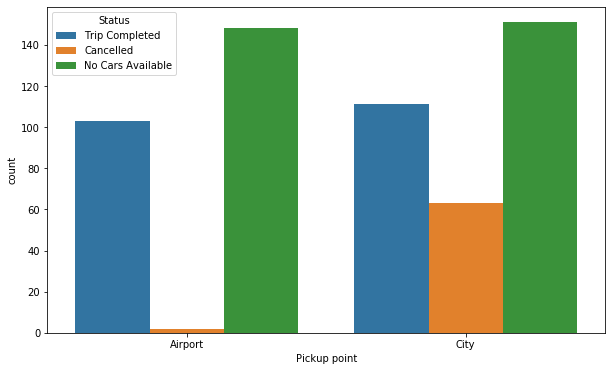

In [122]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue="Status", data= df_Early_mrng)
plt.show

In [124]:
df_EarlyMrng_airport = df_Early_mrng.loc[(df_Early_mrng["Pickup point"]=="Airport")]

In [125]:
df_EarlyMrng_airport["Status"].value_counts()

No Cars Available    148
Trip Completed       103
Cancelled              2
Name: Status, dtype: int64

In [126]:
df_EarlyMrng_City = df_Early_mrng.loc[(df_Early_mrng["Pickup point"]=="City")]

In [127]:
df_EarlyMrng_City["Status"].value_counts()

No Cars Available    151
Trip Completed       111
Cancelled             63
Name: Status, dtype: int64

# Analysis for Late Night hrs

In [128]:
df_Latenight=df[df["Duration"]=="Late_Night"]
df_Latenight.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,drop_hr,Req_hr,Req_day,Duration
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,23.0,22,14,Late_Night
48,6690,Airport,5.0,Trip Completed,2016-07-15 22:41:41,2016-07-15 23:51:00,23.0,22,15,Late_Night
60,1273,Airport,7.0,Trip Completed,2016-07-11 22:07:00,2016-07-11 23:12:00,23.0,22,11,Late_Night
75,1346,Airport,9.0,Trip Completed,2016-07-11 23:39:00,2016-07-12 00:23:00,0.0,23,11,Late_Night
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,0.0,23,13,Late_Night


### Severity issue for late night hrs

In [129]:
df_Latenight.loc[(df_Latenight["Pickup point"]=="Airport") & (df_Latenight["Status"]=="Cancelled")].shape[0]

3

In [130]:
df_Latenight.loc[(df_Latenight["Pickup point"]=="City") & (df_Latenight["Status"]=="Cancelled")].shape[0]

19

### Demand & Supply for late night hrs

In [131]:
df_Latenight["Status"].value_counts()

Trip Completed       257
No Cars Available    219
Cancelled             22
Name: Status, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

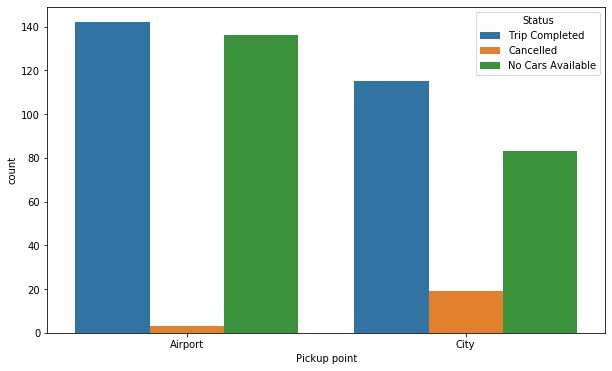

In [132]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", hue="Status", data= df_Latenight)
plt.show

In [134]:
df_Ltnight_airport = df_Latenight.loc[(df_Latenight["Pickup point"]=="Airport")]
df_Ltnight_airport["Status"].value_counts()

Trip Completed       142
No Cars Available    136
Cancelled              3
Name: Status, dtype: int64

In [135]:
df_Ltnight_City = df_Latenight.loc[(df_Latenight["Pickup point"]=="City")]
df_Ltnight_City["Status"].value_counts()

Trip Completed       115
No Cars Available     83
Cancelled             19
Name: Status, dtype: int64

# The End